***Задание***

* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
li = load_iris()
print(li.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df = pd.DataFrame(li.data, columns=li.feature_names)
df = df[['sepal length (cm)','sepal width (cm)']]
df.columns = [['sepal_length' ,'sepal_width']]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [4]:
variety = li.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, variety, test_size=0.25)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [7]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [8]:
lda.predict(X_test)

array([1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1,
       2, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 0])

In [9]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,1
1,1,1
2,2,1
3,0,0
4,0,0
5,2,2
6,0,0
7,0,0
8,2,2
9,0,0


In [10]:
lda.means_

array([[4.971875  , 3.3625    ],
       [5.93170732, 2.76341463],
       [6.55897436, 2.94615385]])

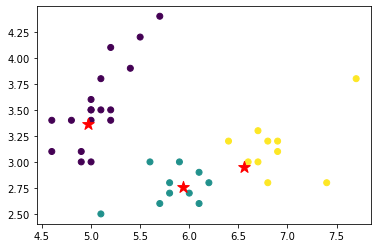

In [11]:
plt.scatter(X_test[['sepal_length']], X_test[['sepal_width']], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

***Задание***

* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [12]:
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=3) #почему три - определяем ниже
clusters = kmeans.fit_predict(df)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

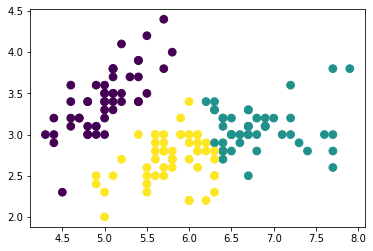

In [15]:
plt.scatter(df[['sepal_length']], df[['sepal_width']], c=clusters, s=60)

In [16]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 7)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

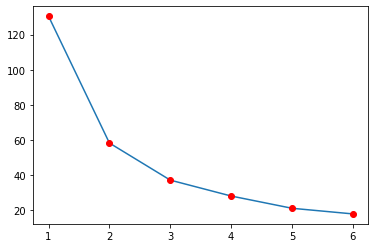

In [17]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
#после 3 график пологий, значит имеет смысл взять три кластера